In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, classification_report
from xgboost import XGBClassifier

In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [4]:
train.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


In [5]:
train.shape

(42100, 19)

In [6]:
format(train.shape)

'(42100, 19)'

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

In [8]:
train.isnull().sum()

id                                      0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28068 entries, 0 to 28067
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    28068 non-null  int64  
 1   no_of_adults                          28068 non-null  int64  
 2   no_of_children                        28068 non-null  int64  
 3   no_of_weekend_nights                  28068 non-null  int64  
 4   no_of_week_nights                     28068 non-null  int64  
 5   type_of_meal_plan                     28068 non-null  int64  
 6   required_car_parking_space            28068 non-null  int64  
 7   room_type_reserved                    28068 non-null  int64  
 8   lead_time                             28068 non-null  int64  
 9   arrival_year                          28068 non-null  int64  
 10  arrival_month                         28068 non-null  int64  
 11  arrival_date   

In [10]:
test.isnull().sum()

id                                      0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
dtype: int64

In [11]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,42100.0,21049.500000,12153.367503,0.0,10524.75,21049.50,31574.25,42099.0
no_of_adults,42100.0,1.920713,0.524950,0.0,2.00,2.00,2.00,4.0
no_of_children,42100.0,0.141093,0.450128,0.0,0.00,0.00,0.00,9.0
no_of_weekend_nights,42100.0,0.884632,0.885693,0.0,0.00,1.00,2.00,7.0
no_of_week_nights,42100.0,2.398005,1.427330,0.0,1.00,2.00,3.00,17.0
type_of_meal_plan,42100.0,0.239192,0.587674,0.0,0.00,0.00,0.00,3.0
required_car_parking_space,42100.0,0.025249,0.156884,0.0,0.00,0.00,0.00,1.0
room_type_reserved,42100.0,0.428931,0.832605,0.0,0.00,0.00,1.00,6.0
lead_time,42100.0,103.888029,81.069343,0.0,37.00,93.00,155.00,443.0
arrival_year,42100.0,2017.856295,0.350795,2017.0,2018.00,2018.00,2018.00,2018.0


In [12]:
train['booking_status'].value_counts()

0    25596
1    16504
Name: booking_status, dtype: int64

In [13]:
train.columns

Index(['id', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [14]:
train_original=train.copy(deep=True)
test_original=test.copy(deep=True)

In [15]:
train.drop('id',axis=1,inplace=True)
test.drop('id',axis=1,inplace=True)

In [16]:
plt.rcParams['figure.figsize']=[10,5]
plt.rcParams['axes.labelsize']=12

In [17]:
train['booking_status'].value_counts()

0    25596
1    16504
Name: booking_status, dtype: int64

<AxesSubplot:xlabel='booking_status', ylabel='count'>

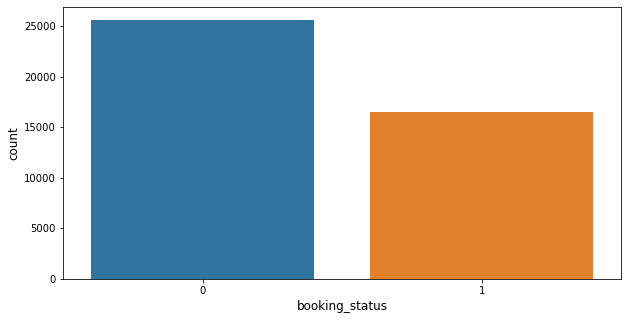

In [18]:
sns.countplot(x=train['booking_status'])

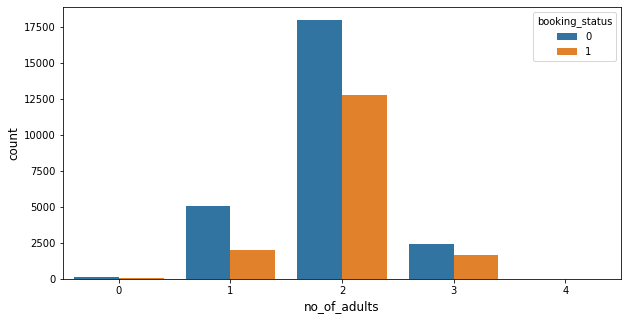

In [19]:
#Number of adults vs Booking status
sns.countplot(x=train['no_of_adults'],hue=train['booking_status'],data=train)
plt.show()

Reservations with 2 adults are highest in number.

There are some fake reservations because we see records with 0 adults.

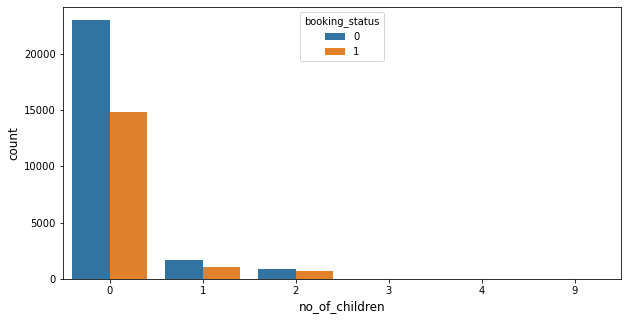

In [20]:
#Number of children vs Booking status
sns.countplot(x=train['no_of_children'],hue=train['booking_status'],data=train)
plt.show()

Reservations for number of children 0 are highest.

<AxesSubplot:>

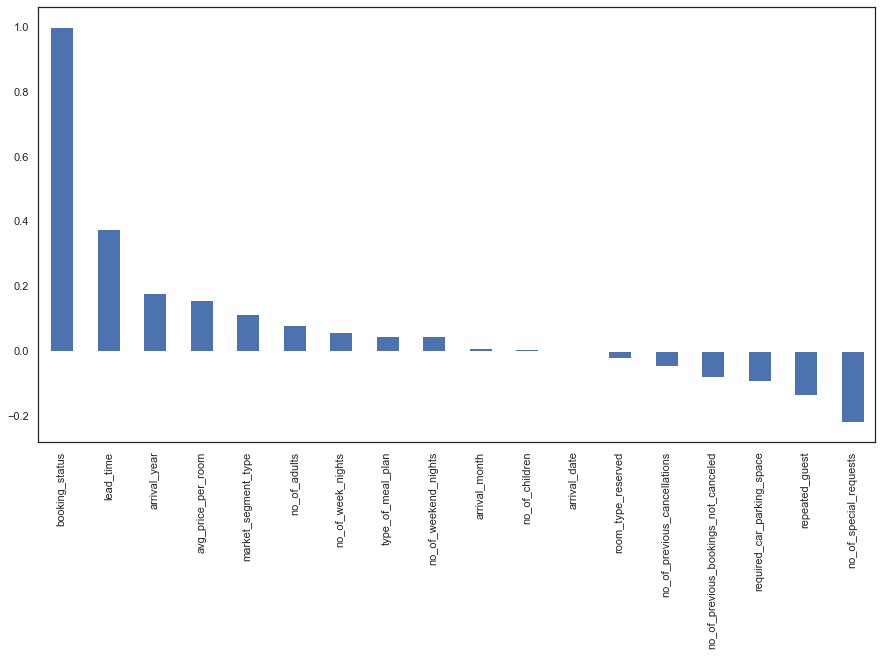

In [21]:
plt.figure(figsize=(15,8))
sns.set(style='white')
train.corr()['booking_status'].sort_values(ascending=False).plot(kind='bar')

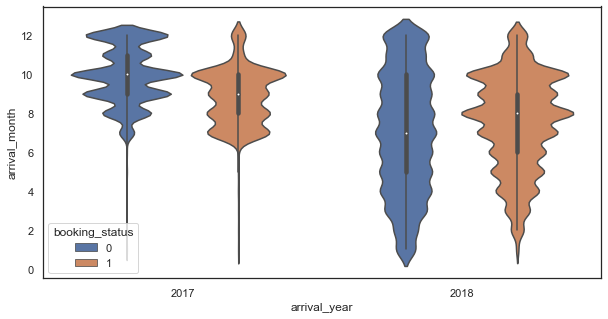

In [24]:
#Arrival year vs Arrival month with Booking status
sns.violinplot(x=train['arrival_year'],y=train['arrival_month'],hue=train['booking_status'])
plt.show()

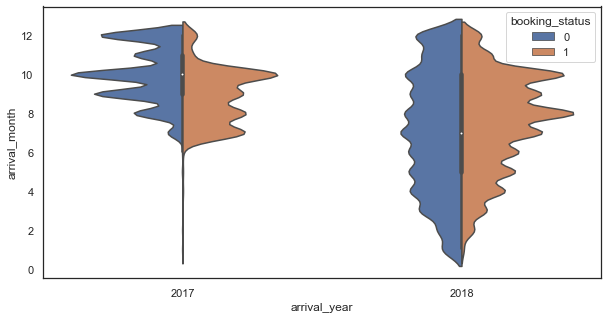

In [25]:
sns.violinplot(x=train['arrival_year'],y=train['arrival_month'],hue=train['booking_status'],split=True)
plt.show()

# Model Building

In [26]:
X=train.drop(['booking_status'],axis=1)
y=train['booking_status']

In [27]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax=sns.distplot(frame[feature],color=color)

In [28]:
X.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

Distrubution Graph


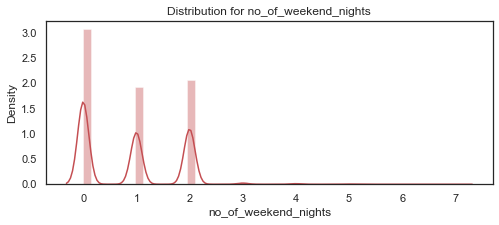

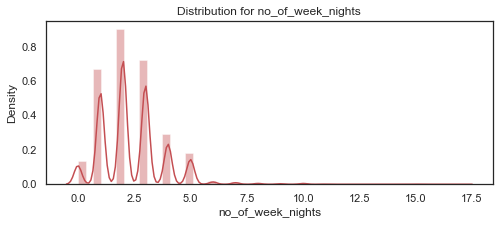

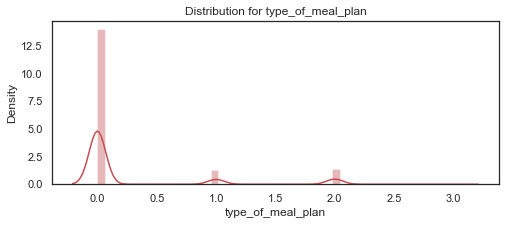

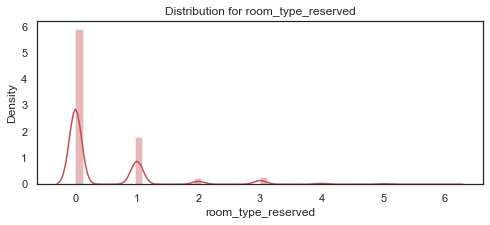

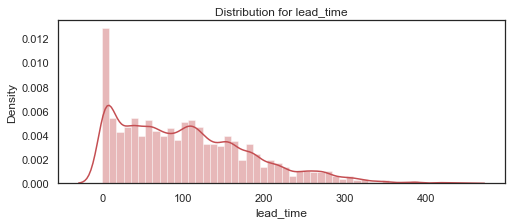

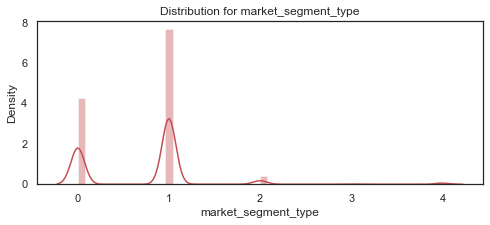

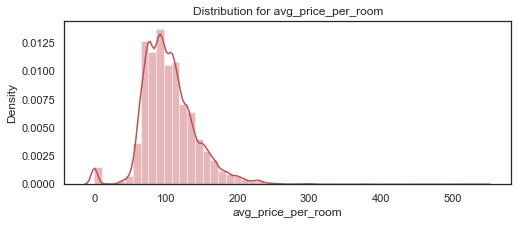

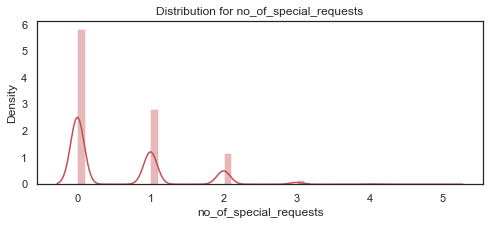

In [29]:
print('Distrubution Graph')
num_cols=['no_of_weekend_nights','no_of_week_nights','type_of_meal_plan','room_type_reserved','lead_time','market_segment_type','avg_price_per_room','no_of_special_requests']
for feat in num_cols: distplot(feat,X)

We use standard scaler to make it evenly distributed.

In [30]:
col=['lead_time','avg_price_per_room']
sc=StandardScaler()
X[col]=sc.fit_transform(X[col])
test[col]=sc.fit_transform(test[col])

Splitting the data between 80:20 rule

In [31]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

ADABOOST CLASSIFIER

Adaboost classifier accuracy
0.7969121140142518
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      5150
           1       0.74      0.73      0.74      3270

    accuracy                           0.80      8420
   macro avg       0.79      0.78      0.79      8420
weighted avg       0.80      0.80      0.80      8420



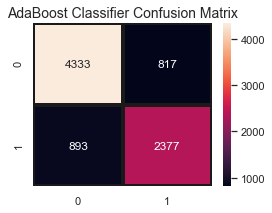

In [32]:
a_model=AdaBoostClassifier()
a_model.fit(X_train,y_train)
a_preds=a_model.predict(X_test)
print('Adaboost classifier accuracy')
print(metrics.accuracy_score(y_test,a_preds))
print(classification_report(y_test,a_preds))
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,a_preds),annot=True,fmt='d',linecolor='k',linewidth='3')
plt.title('AdaBoost Classifier Confusion Matrix',fontsize=14)
plt.show()

GRADIENT BOOSTING CLASSIFIER

Gradient Boosting Classifier 0.8125890736342043
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      5150
           1       0.78      0.71      0.75      3270

    accuracy                           0.81      8420
   macro avg       0.81      0.79      0.80      8420
weighted avg       0.81      0.81      0.81      8420



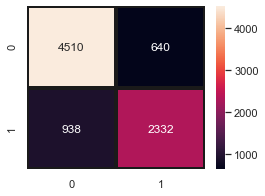

In [37]:
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)
gb_pred=gb.predict(X_test)
print('Gradient Boosting Classifier',accuracy_score(y_test,gb_pred))
print(classification_report(y_test,gb_pred))
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, gb_pred),annot=True,fmt="d",linecolor="k",linewidths=3)
plt.show()

RANDOM FOREST CLASSIFIER

0.808313539192399
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      5150
           1       0.78      0.71      0.74      3270

    accuracy                           0.81      8420
   macro avg       0.80      0.79      0.79      8420
weighted avg       0.81      0.81      0.81      8420

------------------------------------------------------------


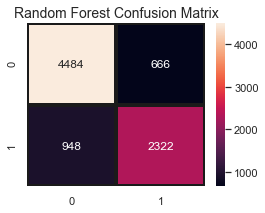

------------------------------------------------------------


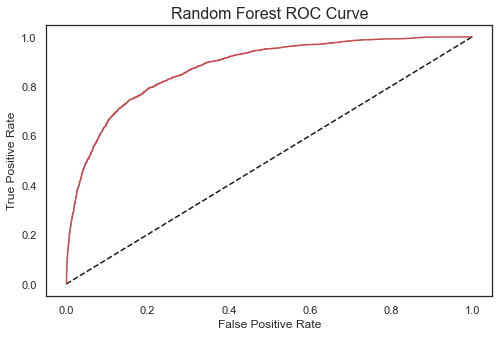

In [39]:
model_rf=RandomForestClassifier(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=65, max_features='auto', max_leaf_nodes=35)
model_rf.fit(X_train,y_train)

#Make prediction
prediction_test=model_rf.predict(X_test)
print(metrics.accuracy_score(y_test,prediction_test))
print('-'*60)

print(classification_report(y_test, prediction_test))
print('-'*60)

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test), annot=True, fmt='d', linecolor='k', linewidths=3)

plt.title("Random Forest Confusion Matrix",fontsize=14)
plt.show()
print('-'*60)

y_rfpred_prob=model_rf.predict_proba(X_test)[:,1]
fpr_rf,tpr_rf,thresholds=roc_curve(y_test,y_rfpred_prob)
plt.figure(figsize=(8,5))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_rf,tpr_rf,label='Random Forest',color='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show()

SVM

SVM accuracy is :  0.6116389548693587
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.61      1.00      0.76      5150
           1       0.00      0.00      0.00      3270

    accuracy                           0.61      8420
   macro avg       0.31      0.50      0.38      8420
weighted avg       0.37      0.61      0.46      8420

------------------------------------------------------------


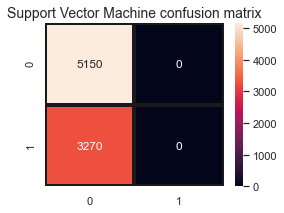

In [42]:
svc_model=SVC()
svc_model.fit(X_train,y_train)
predict_y=svc_model.predict(X_test)
accuracy_svc=svc_model.score(X_test,y_test)
print('SVM accuracy is : ',accuracy_svc)
print('-'*60)
print(classification_report(y_test,predict_y))
print('-'*60)
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predict_y), annot=True, fmt='d', linecolor='k', linewidths=3)
plt.title('Support Vector Machine confusion matrix',fontsize=14)
plt.show()

XGBOOST

XGBClassifier 0.8257719714964371


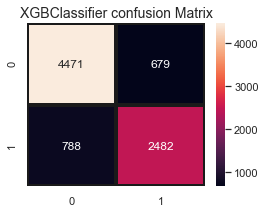

In [44]:
XgB=XGBClassifier()
XgB.fit(X_train, y_train)
Xg_pred=XgB.predict(X_test)
print('XGBClassifier',accuracy_score(y_test, Xg_pred))
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, Xg_pred), annot=True, fmt='d', linecolor='k', linewidths=3)
plt.title('XGBClassifier confusion Matrix',fontsize=14)
plt.show()